# Netflix EDA
-----

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from itertools import combinations

In [2]:
#df_original = pd.read_csv('20netflix-rotten-tomatoes-metacritic-imdb.csv')

In [3]:
df = pd.read_csv('20_netflix-rotten-tomatoes-metacritic-imdb.csv')

---
**Dataset explore** 


In [4]:
df.head(2)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube


In [5]:
df.shape

(15480, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

**Ratings evaluation between different platforms**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hidden Gem Score,13379.0,5.937551,2.250202,0.6,3.8,6.8,7.9,9.8
IMDb Score,13381.0,6.496054,1.146910,1.0,5.8,6.6,7.3,9.7
Rotten Tomatoes Score,6382.0,59.523034,26.999173,0.0,38.0,64.0,83.0,100.0
Metacritic Score,4336.0,56.813653,17.582545,5.0,44.0,57.0,70.0,100.0
Awards Received,6075.0,8.764444,18.311171,1.0,1.0,3.0,8.0,300.0
Awards Nominated For,7661.0,13.983161,29.821052,1.0,2.0,5.0,12.0,386.0
IMDb Votes,13379.0,42728.411615,125701.191329,5.0,403.5,2322.0,20890.5,2354197.0


In [8]:
ratings_df = df.copy()

In [9]:
ratings_df['IMDb Score'] = df['IMDb Score'] * 10

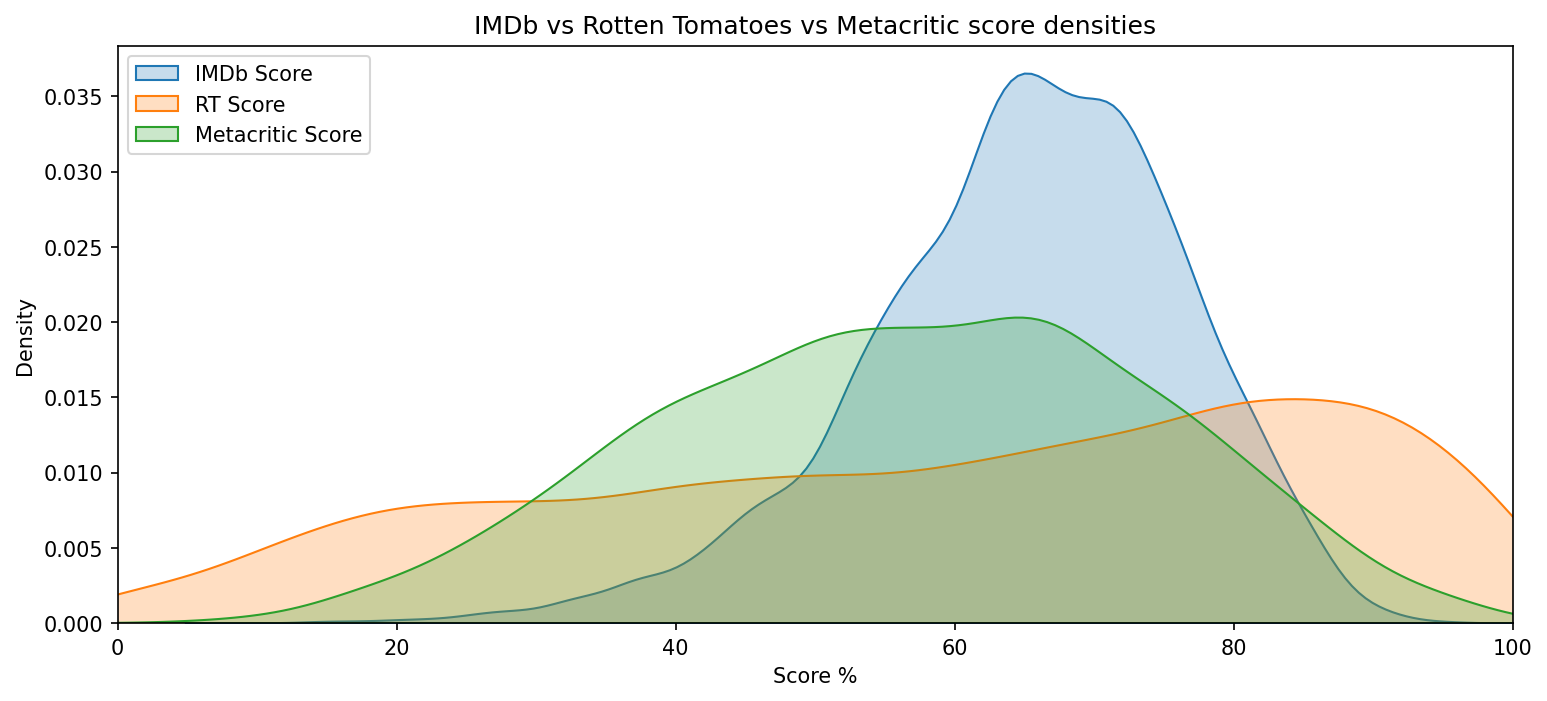

In [10]:
plt.figure(figsize=(12,5), dpi=150)
sns.kdeplot(data=ratings_df, x='IMDb Score', label='IMDb Score', fill=True)
sns.kdeplot(data=ratings_df, x='Rotten Tomatoes Score', label= 'RT Score', fill=True)
sns.kdeplot(data=ratings_df, x='Metacritic Score', label= 'Metacritic Score', fill=True)
plt.legend(loc=('upper left'))
plt.xlim(0,100)
plt.title('IMDb vs Rotten Tomatoes vs Metacritic score densities')
plt.xlabel('Score %')
plt.show()

**Columns selection**

In [11]:
df=df[['Title','Genre','Languages','Series or Movie','Hidden Gem Score','Runtime','Director', 'Actors','IMDb Score','IMDb Votes',
       'Awards Nominated For', 'Awards Received','Boxoffice', 'Netflix Release Date','Country Availability']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 13770 non-null  object 
 2   Languages             13545 non-null  object 
 3   Series or Movie       15480 non-null  object 
 4   Hidden Gem Score      13379 non-null  float64
 5   Runtime               15479 non-null  object 
 6   Director              10772 non-null  object 
 7   Actors                13555 non-null  object 
 8   IMDb Score            13381 non-null  float64
 9   IMDb Votes            13379 non-null  float64
 10  Awards Nominated For  7661 non-null   float64
 11  Awards Received       6075 non-null   float64
 12  Boxoffice             4007 non-null   object 
 13  Netflix Release Date  15480 non-null  object 
 14  Country Availability  15461 non-null  object 
dtypes: float64(5), obje

In [12]:
df.shape

(15480, 15)

In [13]:
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

In [14]:
df['Year'] = pd.to_datetime(df['Netflix Release Date']).dt.year

In [15]:
df['Month'] = pd.to_datetime(df['Netflix Release Date']).dt.month

In [16]:
df.dtypes

Title                           object
Genre                           object
Languages                       object
Series or Movie                 object
Hidden Gem Score               float64
Runtime                         object
Director                        object
Actors                          object
IMDb Score                     float64
IMDb Votes                     float64
Awards Nominated For           float64
Awards Received                float64
Boxoffice                       object
Netflix Release Date    datetime64[ns]
Country Availability            object
Year                             int64
Month                            int64
dtype: object

## Top Genres
**Create a dataset to work with genres**

In [17]:
df_gen = df.copy()
df_gen.dropna(subset=['Genre','IMDb Score','IMDb Votes'],inplace=True)

In [18]:
df_gen['Genre'] = df['Genre'].astype("string")
df_gen['Genre']=df_gen['Genre'].map(lambda x:x.split(','))
df_gen =df_gen.explode('Genre').reset_index(drop=True)
df_gen['Genre'] = df_gen['Genre'].str.strip()

In [19]:
# Take into account only scores above the average
df_gen = df_gen[df_gen['IMDb Score'] > df_gen['IMDb Score'].mean()]

# Create a special rating taking into consideration IMDB votes (80%) and score (20%)
df_gen['mul_rating'] =((0.2*df_gen['IMDb Score'] + 0.8*df_gen['IMDb Votes'])/((0.2*df_gen['IMDb Score'] + 0.8*df_gen['IMDb Votes']).max()))*100

In [20]:
df_gen.describe().T

,count,mean,std,min,25%,50%,75%,max
Hidden Gem Score,18689.0,5.884280,2.162107,1.700000,3.900000,5.80000,8.100000,9.8
IMDb Score,18689.0,7.381791,0.567072,6.600000,6.900000,7.30000,7.800000,9.7
IMDb Votes,18689.0,71812.519557,168118.728762,5.000000,991.000000,5753.00000,59010.000000,2354197.0
Awards Nominated For,12899.0,20.844872,38.008842,1.000000,3.000000,8.00000,21.000000,386.0
Awards Received,11022.0,12.107149,22.572374,1.000000,2.000000,5.00000,12.000000,300.0
Year,18689.0,2017.387394,1.976495,2015.000000,2015.000000,2017.00000,2019.000000,2021.0
Month,18689.0,6.496228,3.430340,1.000000,4.000000,6.00000,10.000000,12.0
mul_rating,18689.0,3.050479,7.141229,0.000282,0.042165,0.24445,2.506655,100.0


In [21]:
# Create a dataframe to evaluate each genre:
df_gen_plot = df_gen.groupby('Genre').agg({'IMDb Score' : np.mean,
                        'IMDb Votes': np.sum,
                            'mul_rating' : np.mean}).reset_index().sort_values('mul_rating', ascending = False)

# Create a min-max normalized 'mul_rating' version of the previous dataframe:
normalized_df =df_gen_plot.copy()
normalized_df['mul_rating'] = ((df_gen_plot['mul_rating']-df_gen_plot['mul_rating'].min())/(df_gen_plot['mul_rating'].max()-df_gen_plot['mul_rating'].min()))*10

**Plot Genres vs Rating**

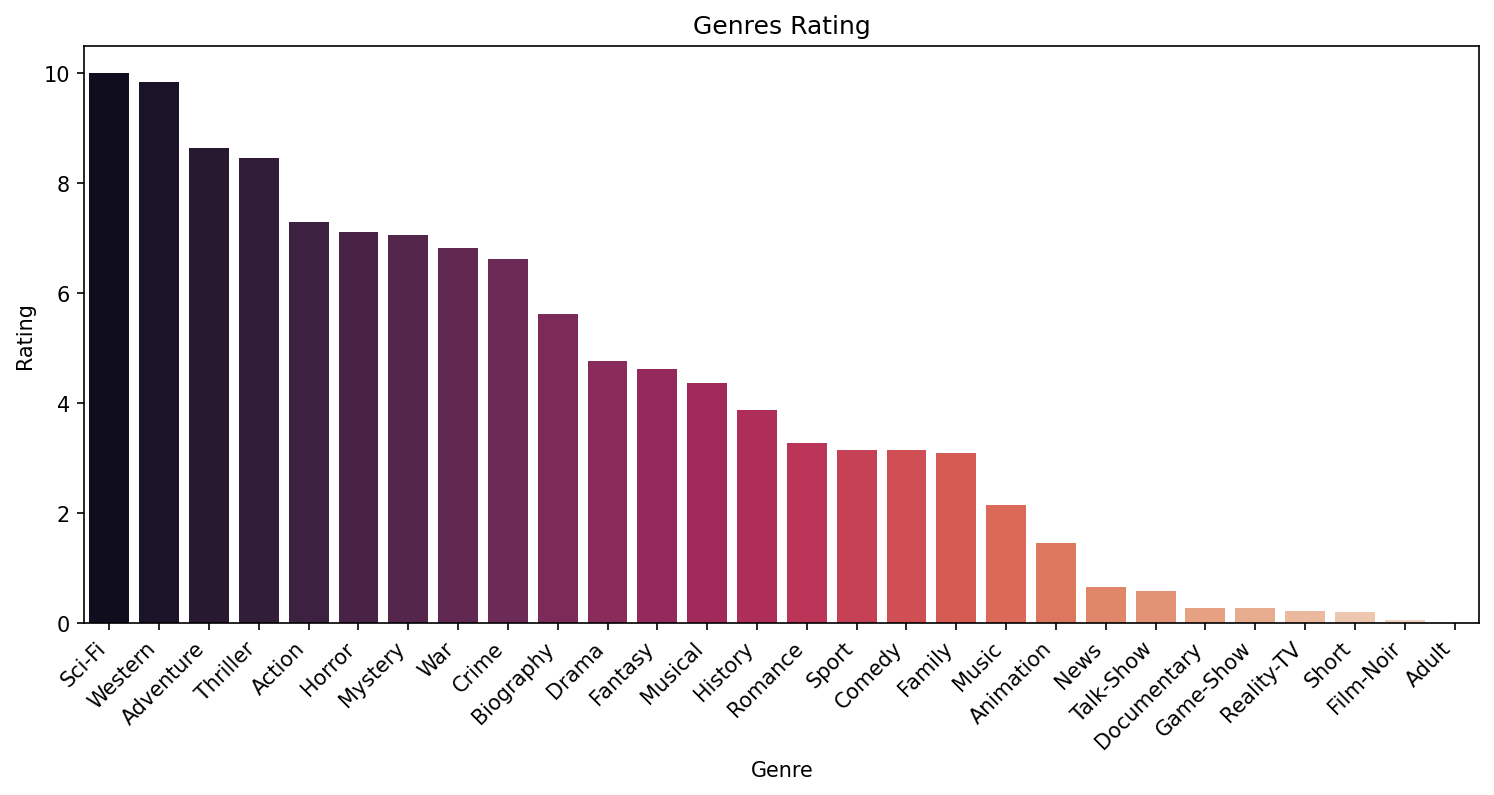

In [22]:
plt.figure(figsize=(12,5), dpi=150)
sns.barplot(data= normalized_df, x='Genre', y='mul_rating', palette='rocket')
plt.title('Genres Rating')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.xticks(rotation = 45, ha='right')
plt.show()

## Popular Genres per Year

In [23]:
#df_gen.groupby(['Year','Genre']).agg({'Genre' : pd.Series.count})

In [24]:
genre_per_year=df_gen.groupby(['Year','Genre'])['Year'].count().reset_index(name="Count of Genres per Year").sort_values(["Year","Count of Genres per Year"],ascending=False)

In [25]:
genre_per_year = genre_per_year[(genre_per_year['Year'] > 2015) & (genre_per_year['Year'] < 2021) ]

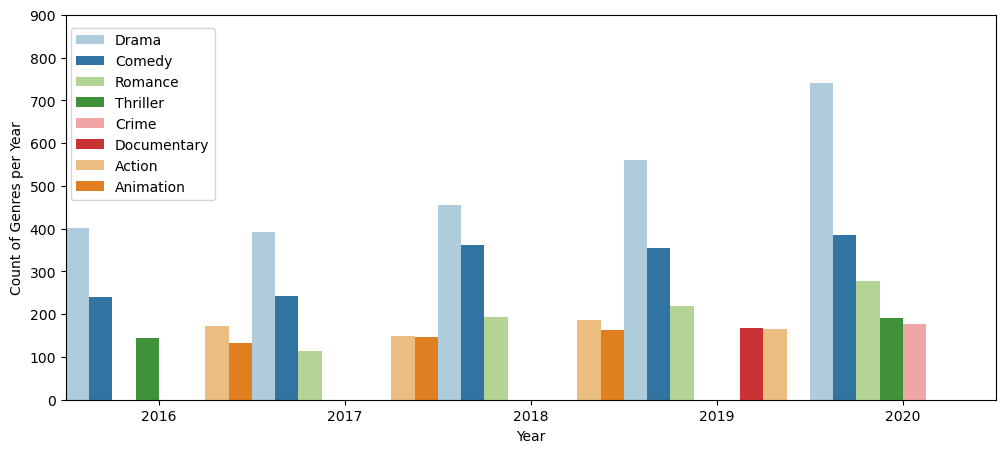

In [26]:
test=genre_per_year.groupby('Year').head(5).reset_index(drop=True)
plt.figure(figsize=(12,5))
sns.barplot(data=test, x="Year", y="Count of Genres per Year", hue="Genre", palette='Paired', width=1)
plt.ylim(0,900)
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png
plt.legend(loc=(0.005,0.52))
plt.show()

## Yearly series and movies production

In [27]:
df_prod = df.groupby(['Year','Series or Movie']).agg({'Title' : pd.Series.count}).reset_index()

In [28]:
df_prod = df_prod[(df_prod['Year'] > 2015) & (df_prod['Year'] < 2021)]

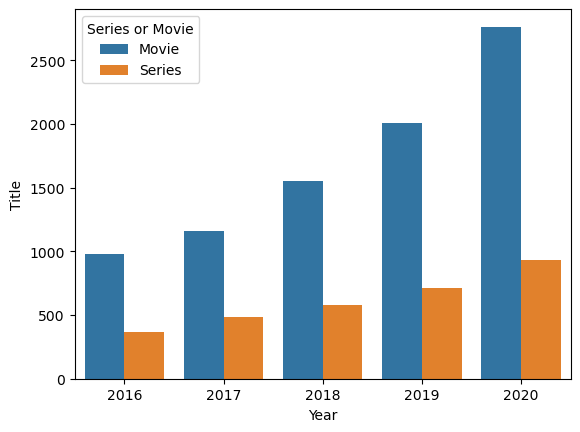

In [29]:
sns.barplot(data=df_prod, x="Year", y="Title", hue="Series or Movie")
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

## Acting Duos

In [30]:
df_act = df.copy()
df_act = df[df['Actors'].notna()]
df_act['Actors'] = df_act['Actors'].astype("string")
df_act['Actors']=df_act['Actors'].map(lambda x:x.split(','))

df_act['Actors']
comblist=[]
def combi(x):
    comb = combinations(x, 2)
    for i in list(comb):
        comblist.append(i)
    return comblist
from collections import Counter
actcom=df_act['Actors'].map(combi)[0]
from collections import Counter
c=Counter(actcom)
import operator
sorted_c = dict( sorted(c.items(), key=operator.itemgetter(1),reverse=True))
#sorted_c


C:\Users\giann\AppData\Local\Temp\ipykernel_10108\668470510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act['Actors'] = df_act['Actors'].astype("string")
C:\Users\giann\AppData\Local\Temp\ipykernel_10108\668470510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act['Actors']=df_act['Actors'].map(lambda x:x.split(','))


C:\Users\giann\AppData\Local\Temp\ipykernel_10108\2215637868.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pairs1 = np.array(pairs)


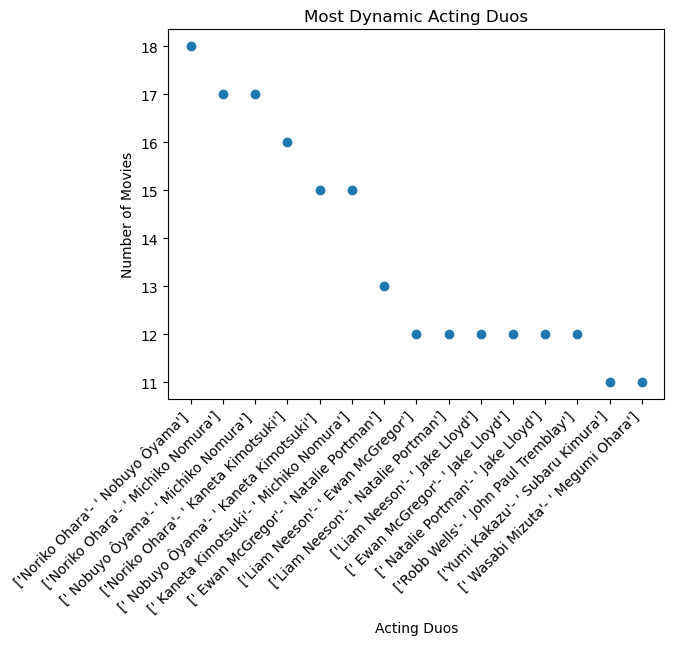

In [31]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
pairs=take(15,sorted_c.items())
pairs1 = np.array(pairs)
lispa1=list(map(lambda x: list(x[0]),pairs))
lispa2=list(map(lambda x: x[1],pairs))
b=list(map(lambda x:str(x).replace(',','-'),lispa1))
plt.scatter(b, lispa2)
plt.xticks(rotation=45, ha='right')
plt.title('Most Dynamic Acting Duos') #title
plt.xlabel('Acting Duos') #x label
plt.ylabel('Number of Movies') #y label
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

In [32]:
##################### Top 10 Directors according to IMDb Score
df_dir = df[df['Director'].notna()]
df_dir['Director'] = df_dir['Director'].astype("string")
df_dir['Director']=df_dir['Director'].map(lambda x:x.split(','))
df_dir

C:\Users\giann\AppData\Local\Temp\ipykernel_10108\2712775826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir['Director'] = df_dir['Director'].astype("string")
C:\Users\giann\AppData\Local\Temp\ipykernel_10108\2712775826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir['Director']=df_dir['Director'].map(lambda x:x.split(','))


,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Runtime,Director,Actors,IMDb Score,IMDb Votes,Awards Nominated For,Awards Received,Boxoffice,Netflix Release Date,Country Availability,Year,Month
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,< 30 minutes,[Tomas Alfredson],"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,1-2 hour,[Coky Giedroyc],"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",5.8,2838.0,NaN,1.0,"$70,632",2021-03-04,Canada,2021,3
2,Centigrade,"Drama, Thriller",English,Movie,6.4,1-2 hour,[Brendan Walsh],"Genesis Rodriguez, Vincent Piazza",4.3,1720.0,NaN,NaN,"$16,263",2021-03-04,Canada,2021,3
4,Moxie,"Animation, Short, Drama",English,Movie,8.1,1-2 hour,[Stephen Irwin],Ragga Gudrun,6.3,63.0,4.0,NaN,NaN,2021-03-04,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",2021,3
5,The Con-Heartist,"Comedy, Romance",Thai,Movie,8.6,> 2 hrs,[Mez Tharatorn],"Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya...",7.4,131.0,NaN,NaN,NaN,2021-03-03,Thailand,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,District 13: Ultimatum,"Action, Crime, Thriller","French, English",Movie,3.4,1-2 hour,[Patrick Alessandrin],"David Belle, Daniel Duval, Cyril Raffaelli, Ph...",6.5,42967.0,1.0,NaN,"$36,136",2015-04-14,France,2015,4
15465,13 Going on 30,"Comedy, Fantasy, Romance","English, Portuguese",Movie,3.1,1-2 hour,[Gary Winick],"Jennifer Garner, Mark Ruffalo, Andy Serkis, Ju...",6.2,167842.0,11.0,NaN,"$57,231,747",2015-04-14,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",2015,4
15466,LIFE 2.0,Documentary,English,Movie,8.2,1-2 hour,[Jason Spingarn-Koff],Teasa Copprue,6.2,878.0,NaN,1.0,NaN,2015-04-14,"Hungary,Lithuania,India,Australia,United Kingd...",2015,4
15467,Brand New Day,"Documentary, Music",English,Movie,8.6,1-2 hour,[Amos Gitai],"Clem Burke, Ryuichi Sakamoto, Patrick Seymour,...",7.3,14.0,NaN,NaN,NaN,2015-04-14,Australia,2015,4


In [33]:
df_dir=df_dir.explode('Director').reset_index(drop=True)
df_dir
df_dir['Director_Count']=list(map(lambda x:  df_dir['Director'].value_counts()[x], df_dir['Director']))
df_dir.head(3)

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Runtime,Director,Actors,IMDb Score,IMDb Votes,Awards Nominated For,Awards Received,Boxoffice,Netflix Release Date,Country Availability,Year,Month,Director_Count
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3,5
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,1-2 hour,Coky Giedroyc,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",5.8,2838.0,NaN,1.0,"$70,632",2021-03-04,Canada,2021,3,1
2,Centigrade,"Drama, Thriller",English,Movie,6.4,1-2 hour,Brendan Walsh,"Genesis Rodriguez, Vincent Piazza",4.3,1720.0,NaN,NaN,"$16,263",2021-03-04,Canada,2021,3,1


In [34]:

df_dir1=df_dir.groupby('Director').agg({'Hidden Gem Score':np.mean,
                                         'IMDb Score':np.mean,
                                         'IMDb Votes':np.sum,
                                         'Director_Count':pd.Series.count,
                                         'Awards Received':np.sum}).reset_index()
df_dir1


,Director,Hidden Gem Score,IMDb Score,IMDb Votes,Director_Count,Awards Received
0,Aamir Khan,4.40,8.400000,169982.0,1,23.0
1,Aaron Horvath,3.80,6.800000,16601.0,1,0.0
2,Aaron Seelman,5.90,5.400000,1781.0,1,0.0
3,Aaron Seltzer,1.50,3.650000,27840.0,2,0.0
4,Abbas Alibhai Burmawalla,3.20,5.366667,32400.0,3,11.0
...,...,...,...,...,...,...
7473,Óscar Menéndez,NaN,NaN,0.0,1,0.0
7474,Ömer Faruk Sorak,3.65,7.350000,49718.0,2,3.0
7475,Ömer Ugur,6.95,4.700000,1644.0,2,0.0
7476,Ömer Vargi,5.70,6.200000,4742.0,1,1.0


In [35]:
df_dir2=df_dir1[(df_dir1['IMDb Votes']>df_dir1['IMDb Votes'].mean())
       & (df_dir1['Director_Count']>df_dir1['Director_Count'].mean())
       & (df_dir1['Awards Received']>df_dir1['Awards Received'].mean())].sort_values(['IMDb Score','IMDb Votes'],ascending=False)[['Director','IMDb Score']].head(10)

In [36]:
#Top Directors according to IMDb Score (IMDb Votes,Director_Count,Awards Received above the average mean)
df_dir2

,Director,IMDb Score
1962,Christopher Nolan,8.462500
6352,Sergio Leone,8.433333
2733,Frank Darabont,8.333333
1168,Alfred Hitchcock,8.300000
5732,Quentin Tarantino,8.250000
4921,Mel Gibson,8.200000
2252,David Lean,8.150000
6557,Stanley Kubrick,8.140000
6149,S.S. Rajamouli,8.085714
3355,James Cameron,8.075000


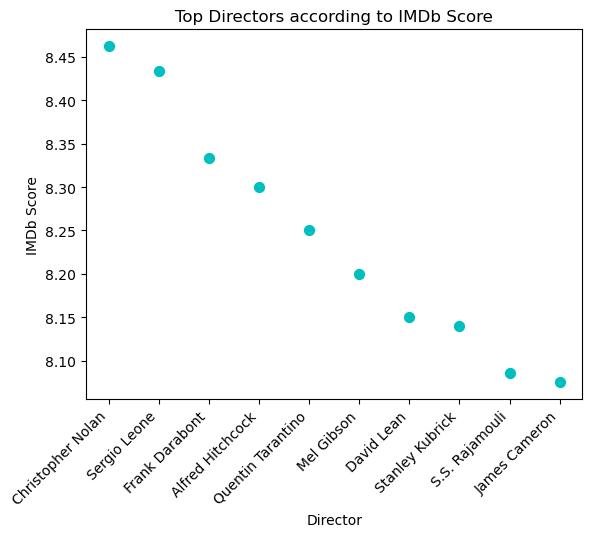

In [37]:
df_dir2.plot.scatter(x='Director', y="IMDb Score", c="c", s=50,rot=90)
plt.title('Top Directors according to IMDb Score')
plt.xticks(rotation = 45, ha='right')
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

In [38]:
df_act = df[df['Actors'].notna()]
df_act['Actors'] = df_act['Actors'].astype("string")
df_act['Actors']=df_act['Actors'].map(lambda x:x.split(','))
df_act=df_act.explode('Actors').reset_index(drop=True)
df_act
df_act = df_act[df_act['Genre'].notna()]
df_act['Genre'] = df_act['Genre'].astype("string")
df_act['Genre']=df_act['Genre'].map(lambda x:x.split(','))
df_act=df_act.explode('Genre').reset_index(drop=True)
df_act['Genre'] = df_act['Genre'].str.strip()
df_act.head()

C:\Users\giann\AppData\Local\Temp\ipykernel_10108\1981111943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act['Actors'] = df_act['Actors'].astype("string")
C:\Users\giann\AppData\Local\Temp\ipykernel_10108\1981111943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_act['Actors']=df_act['Actors'].map(lambda x:x.split(','))


,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Runtime,Director,Actors,IMDb Score,IMDb Votes,Awards Nominated For,Awards Received,Boxoffice,Netflix Release Date,Country Availability,Year,Month
0,Lets Fight Ghost,Crime,"Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,Kåre Hedebrant,7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3
1,Lets Fight Ghost,Drama,"Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,Kåre Hedebrant,7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3
2,Lets Fight Ghost,Fantasy,"Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,Kåre Hedebrant,7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3
3,Lets Fight Ghost,Horror,"Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,Kåre Hedebrant,7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3
4,Lets Fight Ghost,Romance,"Swedish, Spanish",Series,4.3,< 30 minutes,Tomas Alfredson,Kåre Hedebrant,7.9,205926.0,57.0,74.0,"$2,122,065",2021-03-04,Thailand,2021,3


In [39]:
###################Top Genre-Diverse Actors
df_act2=df_act.groupby('Actors').nunique()[['Genre','Title']].reset_index()
df_act2.sort_values('Genre',ascending=False).head(10)

,Actors,Genre,Title
6128,Ewan McGregor,21,32
30702,Woody Harrelson,19,22
3339,Channing Tatum,18,18
13571,Matthew McConaughey,18,24
17139,Robert De Niro,17,34
25374,Jack Black,17,20
15180,Nicole Kidman,17,27
22176,Alec Baldwin,17,15
11505,Kurt Russell,17,13
20196,Tom Hanks,17,24


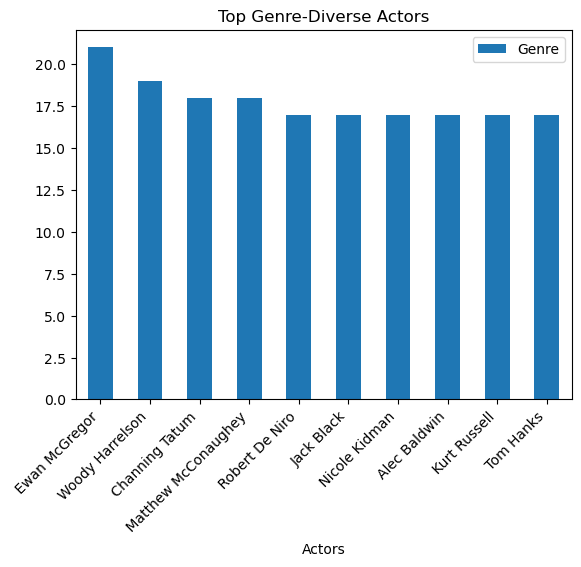

In [40]:
a = df_act2.sort_values('Genre',ascending=False).head(10).plot(x='Actors', y='Genre', kind="bar", rot=90)
plt.title('Top Genre-Diverse Actors') 
plt.xticks(rotation = 45, ha='right')
plt.savefig('figure1.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

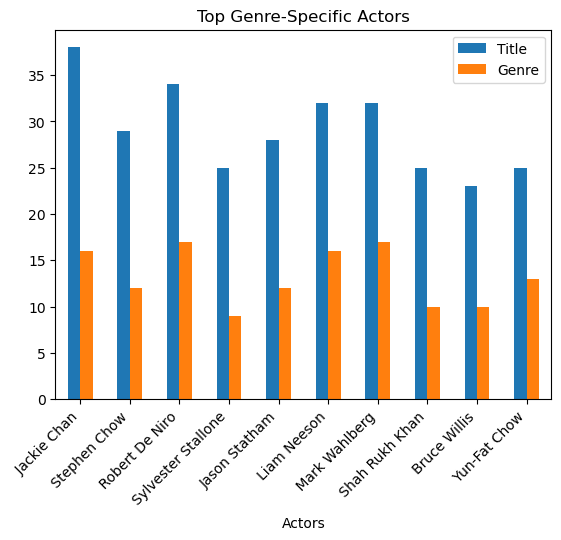

In [41]:
# Top genre-specific actors
df_act2['Difference'] = df_act2['Title']-df_act2['Genre']
df_act2.sort_values('Difference',ascending=False)
ax = df_act2.sort_values('Difference',ascending=False).head(10).plot(x='Actors', y=['Title','Genre'], kind="bar", rot=90)
plt.title('Top Genre-Specific Actors')
plt.xticks(rotation = 45, ha='right')
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

-------------------

## Merge with new dataset

In [42]:
df22 = pd.read_csv('20_netflix_titles.csv')

In [43]:
df_merge1 = df.merge(df22[['title','country','duration']],right_on='title', left_on='Title', how='inner')

In [44]:
df_merge1.columns

Index(['Title', 'Genre', 'Languages', 'Series or Movie', 'Hidden Gem Score',
       'Runtime', 'Director', 'Actors', 'IMDb Score', 'IMDb Votes',
       'Awards Nominated For', 'Awards Received', 'Boxoffice',
       'Netflix Release Date', 'Country Availability', 'Year', 'Month',
       'title', 'country', 'duration'],
      dtype='object')

In [45]:
df_merge1 = df_merge1[['Title', 'Series or Movie', 'Genre','country', 'Languages','Country Availability','IMDb Score','IMDb Votes','Awards Received','Awards Nominated For', 'duration', 'Netflix Release Date']]

In [46]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5801 entries, 0 to 5800
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Title                 5801 non-null   object        
 1   Series or Movie       5801 non-null   object        
 2   Genre                 5458 non-null   object        
 3   country               5397 non-null   object        
 4   Languages             5279 non-null   object        
 5   Country Availability  5793 non-null   object        
 6   IMDb Score            5341 non-null   float64       
 7   IMDb Votes            5341 non-null   float64       
 8   Awards Received       2090 non-null   float64       
 9   Awards Nominated For  2719 non-null   float64       
 10  duration              5801 non-null   object        
 11  Netflix Release Date  5801 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 589.2+ KB


In [47]:
df_merge1.groupby('country')['country'].count()


country
Argentina                                              42
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile, Peru                                  1
Argentina, France                                       1
Argentina, France, United States, Germany, Qatar        1
                                                       ..
Uruguay, Guatemala                                      1
Uruguay, Spain, Mexico                                  1
Vietnam                                                 2
West Germany                                            1
Zimbabwe                                                1
Name: country, Length: 536, dtype: int64

In [48]:
df_merge1['country'] = str(df_merge1['country'])
df_merge1['first_country'] = df_merge1['country'].apply(lambda x: x.split(",")[0])

In [49]:
df_merge1

,Title,Series or Movie,Genre,country,Languages,Country Availability,IMDb Score,IMDb Votes,Awards Received,Awards Nominated For,duration,Netflix Release Date,first_country
0,Joker,Movie,"Crime, Drama, Thriller",0 India\n1 India\n...,English,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",8.4,951938.0,112.0,228.0,98 min,2021-03-03,0 India\n1 India\n...
1,Joker,Movie,"Crime, Drama, Thriller",0 India\n1 India\n...,English,"Japan,Sweden",8.4,951938.0,112.0,228.0,98 min,2020-08-08,0 India\n1 India\n...
2,Joker,Movie,"Comedy, Family, Sci-Fi",0 India\n1 India\n...,Hindi,"India,Hungary,Slovakia,Lithuania,United Kingdo...",2.4,5084.0,5.0,1.0,98 min,2018-08-02,0 India\n1 India\n...
3,Ordinary People,Movie,Drama,0 India\n1 India\n...,English,South Korea,7.7,47265.0,19.0,14.0,107 min,2021-02-28,0 India\n1 India\n...
4,Ordinary People,Movie,Drama,0 India\n1 India\n...,English,"Australia,Lithuania,Japan,United Kingdom,Russi...",7.7,47265.0,19.0,14.0,107 min,2020-06-26,0 India\n1 India\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,Easy Fortune Happy Life,Series,NaN,0 India\n1 India\n...,NaN,"Australia,Singapore,United Kingdom,United Stat...",NaN,NaN,NaN,NaN,1 Season,2015-04-14,0 India\n1 India\n...
5797,K-POP Extreme Survival,Series,NaN,0 India\n1 India\n...,NaN,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,1 Season,2015-04-14,0 India\n1 India\n...
5798,DreamWorks Happy Holidays from Madagascar,Series,"Animation, Comedy, Family",0 India\n1 India\n...,English,"Belgium,Switzerland,United States,Germany,Unit...",6.8,71.0,NaN,NaN,1 Season,2015-04-14,0 India\n1 India\n...
5799,DreamWorks Holiday Classics,Series,"Animation, Comedy, Family",0 India\n1 India\n...,English,"Belgium,Switzerland,Germany,Argentina,United K...",6.4,82.0,NaN,NaN,1 Season,2015-04-14,0 India\n1 India\n...


## Boxoffice

In [50]:
df_boxoffice = df_gen.dropna(subset='Boxoffice')

In [51]:
df_boxoffice['Boxoffice'] = df_boxoffice['Boxoffice'].replace(r'[\$,]','',regex=True)

C:\Users\giann\AppData\Local\Temp\ipykernel_10108\2988445011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxoffice['Boxoffice'] = df_boxoffice['Boxoffice'].replace(r'[\$,]','',regex=True)


In [52]:
df_boxoffice['Boxoffice'] = pd.to_numeric(df_boxoffice['Boxoffice'])

C:\Users\giann\AppData\Local\Temp\ipykernel_10108\3895263501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxoffice['Boxoffice'] = pd.to_numeric(df_boxoffice['Boxoffice'])


In [53]:
df_boxoffice_series = df_boxoffice[df_boxoffice['Series or Movie'] == 'Series'].groupby(['Genre']).agg({'Boxoffice' : np.sum}).sort_values('Boxoffice', ascending=False).reset_index().head(10)

In [54]:
df_boxoffice_movies = df_boxoffice[df_boxoffice['Series or Movie'] == 'Movie'].groupby(['Genre']).agg({'Boxoffice' : np.sum}).sort_values('Boxoffice', ascending=False).reset_index().head(10)

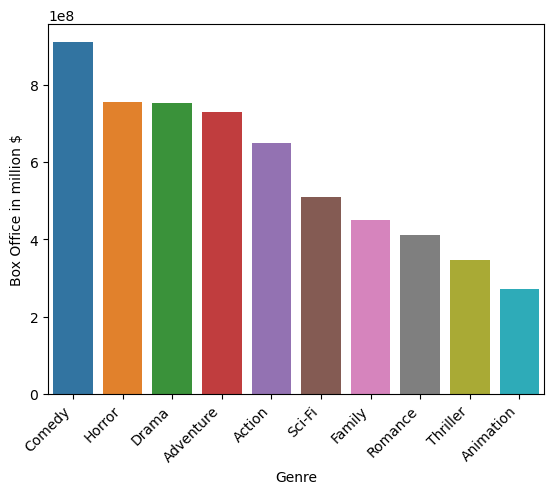

In [55]:
sns.barplot(data=df_boxoffice_series, x="Genre", y="Boxoffice")
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Box Office in million $')
plt.savefig('figure.png', transparent=True,bbox_inches='tight') # save as png

plt.show()

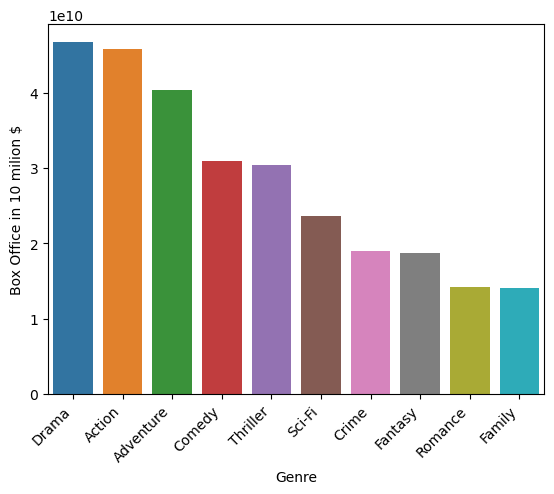

In [56]:
sns.barplot(data=df_boxoffice_movies, x="Genre", y="Boxoffice")
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Box Office in 10 milion $')
plt.savefig('figure1.png', transparent=True,bbox_inches='tight') # save as png

plt.show()